# Exploratory Data Analysis

This notebook initiates our exploration of the sleep efficiency dataset. We'll conduct an initial assessment and preprocessing of the data, focusing on the sleep efficiency metric as our target variable. This preliminary analysis will establish the foundation for more advanced modeling in subsequent notebooks.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sleep_health.config import DATA_DIR

In [5]:
raw_data = pd.read_csv(DATA_DIR / 'raw' / 'Sleep_Efficiency.csv')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     438 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

Most of the data seems complete, only these columns have missing values:
1. Awakenings
2. Caffeine consumption
3. Alcohol consumption
4. Exercise frequency

In [6]:
raw_data.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


As most of the data is already numerical we don't need to convert much of those values other than:
1. Gender
2. Bedtime
3. Wakeup time
4. Smoking status

For gender and smoking status a simple codification is enough.
For the wakeup time and bedtime i believe that the most important value is how late or how early the subject goes to sleep as we already have the duration of the sleep. With this in mind, we can replace both those columns for a new one: "Bedtime" which will range from 0 to 23 (the hour of the day that the subject slept)

## Processing Columns

In [7]:
## Using an iterim processed_df to clean and format the data
interim_df = raw_data.copy()

In [8]:
if not pd.api.types.is_datetime64_any_dtype(interim_df['Bedtime']):
    interim_df['Bedtime'] = pd.to_datetime(interim_df['Bedtime'])

if not pd.api.types.is_datetime64_any_dtype(interim_df['Wakeup time']):
    interim_df['Wakeup time'] = pd.to_datetime(interim_df['Wakeup time'])


interim_df['Bedtime_hour'] = interim_df['Bedtime'].dt.hour

interim_df['Gender_encoded'] = interim_df['Gender'].map({'Male': 0, 'Female': 1})

interim_df['Smoking_encoded'] = interim_df['Smoking status'].map({'No': 0, 'Yes': 1})

interim_df = interim_df.drop(['Bedtime', 'Wakeup time', 'Gender', 'Smoking status'], axis=1)

In [9]:
interim_df.head()

,ID,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency,Bedtime_hour,Gender_encoded,Smoking_encoded
0,1,65,6.0,0.88,18,70,12,0.0,0.0,0.0,3.0,1,1,1
1,2,69,7.0,0.66,19,28,53,3.0,0.0,3.0,3.0,2,0,1
2,3,40,8.0,0.89,20,70,10,1.0,0.0,0.0,3.0,21,1,0
3,4,40,6.0,0.51,23,25,52,3.0,50.0,5.0,1.0,2,1,1
4,5,57,8.0,0.76,27,55,18,3.0,0.0,3.0,3.0,1,0,0


### Acessing null values

In [10]:
print("##### Awakenings #####")
print(raw_data.Awakenings.unique())
print("Number of NaN values: ", len(raw_data[raw_data["Awakenings"].isna()]))

print("##### Caffeine consumption #####")
print(raw_data["Caffeine consumption"].unique())
print("Number of NaN values: ", len(raw_data[raw_data["Caffeine consumption"].isna()]))

print("##### Alcohol consumption #####")
print(raw_data["Alcohol consumption"].unique())
print("Number of NaN values: ", len(raw_data[raw_data["Alcohol consumption"].isna()]))

print("##### Exercise frequency #####")
print(raw_data["Exercise frequency"].unique())
print("Number of NaN values: ", len(raw_data[raw_data["Exercise frequency"].isna()]))


len(interim_df), len(interim_df.dropna())

##### Awakenings #####
[ 0.  3.  1.  2.  4. nan]
Number of NaN values:  20
##### Caffeine consumption #####
[  0.  50.  nan  25.  75. 200. 100.]
Number of NaN values:  25
##### Alcohol consumption #####
[ 0.  3.  5.  1.  2. nan  4.]
Number of NaN values:  14
##### Exercise frequency #####
[ 3.  1.  0.  5.  2.  4. nan]
Number of NaN values:  6


(452, 388)

At first, I thought the NaN values might represent the 0 score, but there are 0 values present in all the columns, so they are just missing values.
Almost all of the missing values seem to be from different lines which is bad as we loose too many values (around 15% of our dataset). So, i will assign the mean to those values so we don't loose that many data.

In [11]:
columns_to_fill = ['Awakenings', 'Caffeine consumption', 'Alcohol consumption', 'Exercise frequency']


for column in columns_to_fill:
    mean_value = round(interim_df[column].mean())
    interim_df.fillna({column:mean_value}, inplace=True)  

print("Valores nulos restantes:")
print(interim_df.isna().sum())

Valores nulos restantes:
ID                        0
Age                       0
Sleep duration            0
Sleep efficiency          0
REM sleep percentage      0
Deep sleep percentage     0
Light sleep percentage    0
Awakenings                0
Caffeine consumption      0
Alcohol consumption       0
Exercise frequency        0
Bedtime_hour              0
Gender_encoded            0
Smoking_encoded           0
dtype: int64


## Analysing the data

In [12]:
processed_df = interim_df.copy()

### Correlation Matrix

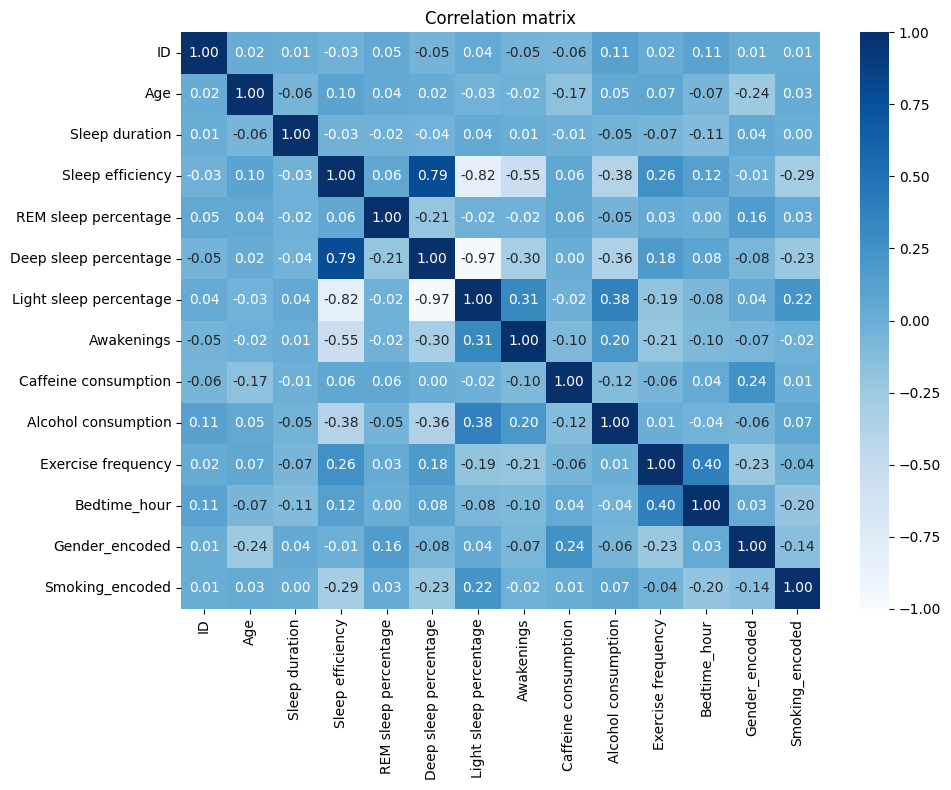

In [13]:
corr_matrix = processed_df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, cmap="Blues", annot=True, fmt='.2f', vmin=-1, vmax=1)
plt.title("Correlation matrix")
plt.tight_layout()
plt.show()

Based on the correlation plot, sleep efficiency demonstrates strong relationships with just a few variables:

- Sleep components: As expected, sleep efficiency strongly correlates with deep sleep percentage, light sleep percentage, and number of awakenings. This relationship is logical since sleep efficiency is calculated as the ratio of time spent asleep to total time in bed. However, the REM sleep percentage seems to have little effect on the sleep efficiency.
- Health habits: Sleep efficiency shows meaningful correlations with lifestyle factors:

    - Negative correlation with alcohol consumption
    - Negative correlation with smoking habits
    - Positive correlation with exercise frequency



Interestingly, caffeine consumption appears to have minimal impact on sleep efficiency, contrary to what might be commonly assumed.

For subsequent analysis, I will exclude the awakenings, deep sleep percentage, and light sleep percentage variables, as these are direct components of the sleep efficiency calculation and would create redundancy in our modeling.

In [14]:
processed_df.drop(['REM sleep percentage', 'Deep sleep percentage', 'Light sleep percentage', 'Awakenings'], axis=1, inplace=True)

In [15]:
processed_df.to_csv(DATA_DIR / 'processed' / 'processed_data.csv')

### Distribuitions

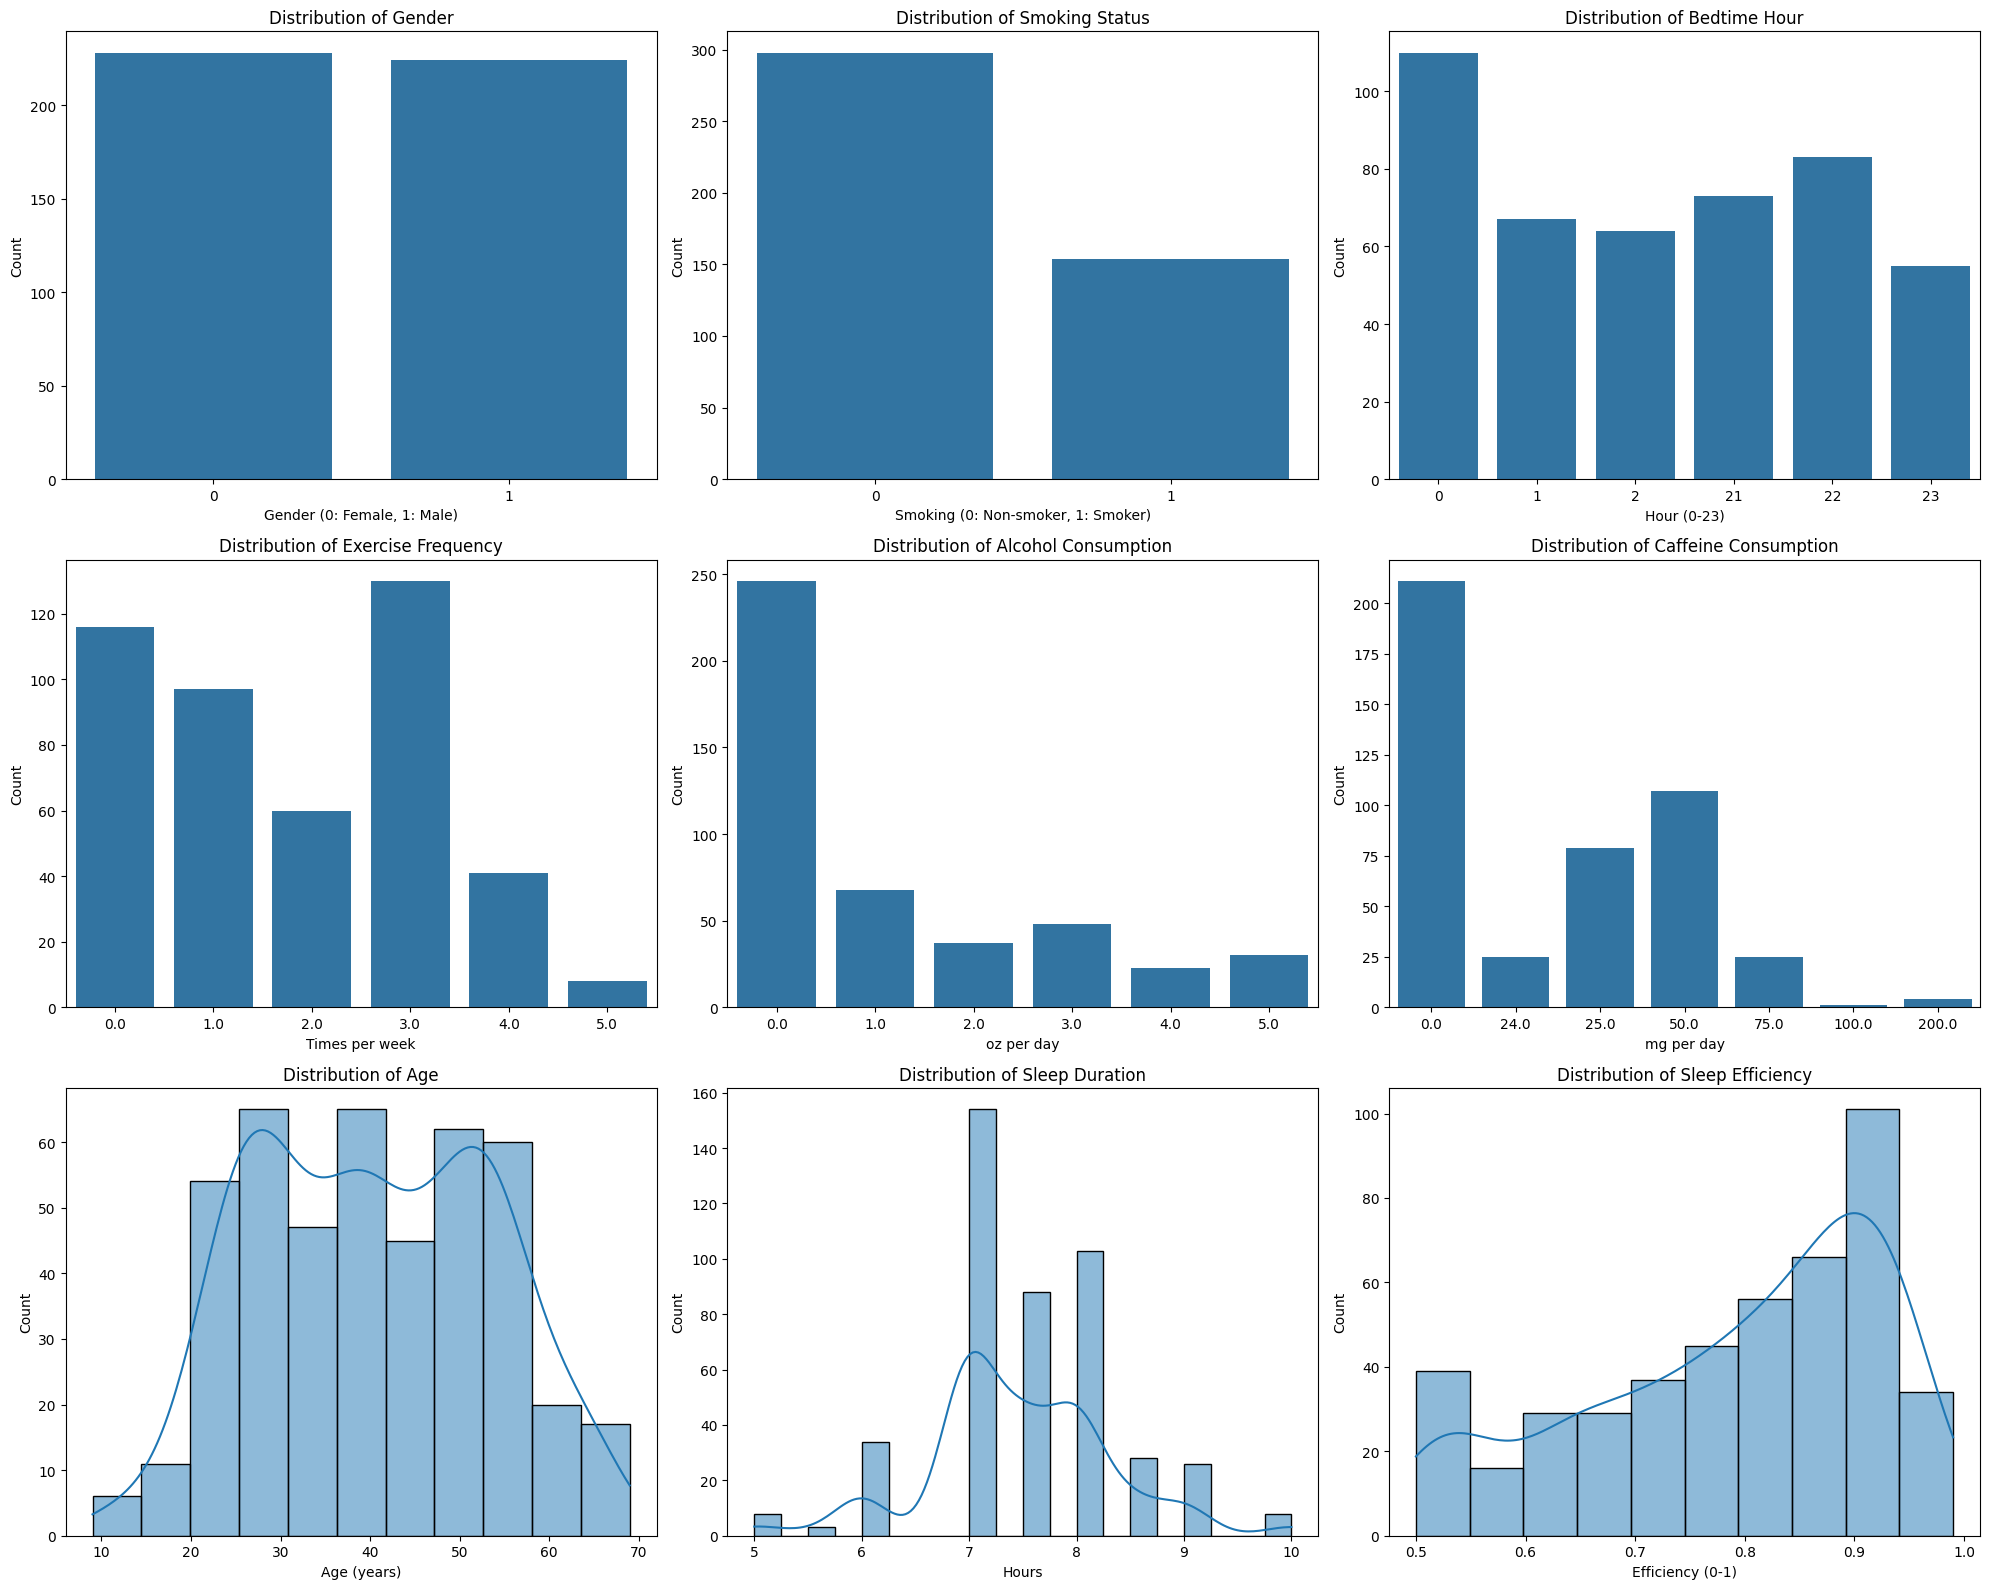

In [16]:
plt.figure(figsize=(20, 16))

# Based on the value counts, we can identify:
# Categorical variables: Gender_encoded, Smoking_encoded, Bedtime_hour
# Discrete variables with few values: Exercise frequency, Alcohol consumption, Caffeine consumption
# Continuous variables: Age, Sleep duration, Sleep efficiency

# 1. Categorical Variables
plt.subplot(3, 3, 1)
sns.countplot(x='Gender_encoded', data=processed_df)
plt.title('Distribution of Gender')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Count')

plt.subplot(3, 3, 2)
sns.countplot(x='Smoking_encoded', data=processed_df)
plt.title('Distribution of Smoking Status')
plt.xlabel('Smoking (0: Non-smoker, 1: Smoker)')
plt.ylabel('Count')

plt.subplot(3, 3, 3)
sns.countplot(x='Bedtime_hour', data=processed_df)
plt.title('Distribution of Bedtime Hour')
plt.xlabel('Hour (0-23)')
plt.ylabel('Count')

# 2. Discrete Variables with Few Values
plt.subplot(3, 3, 4)
sns.countplot(x='Exercise frequency', data=processed_df)
plt.title('Distribution of Exercise Frequency')
plt.xlabel('Times per week')
plt.ylabel('Count')

plt.subplot(3, 3, 5)
sns.countplot(x='Alcohol consumption', data=processed_df)
plt.title('Distribution of Alcohol Consumption')
plt.xlabel('oz per day')
plt.ylabel('Count')

plt.subplot(3, 3, 6)
sns.countplot(x='Caffeine consumption', data=processed_df)
plt.title('Distribution of Caffeine Consumption')
plt.xlabel('mg per day')
plt.ylabel('Count')

# 3. Continuous Variables
plt.subplot(3, 3, 7)
sns.histplot(processed_df['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age (years)')
plt.ylabel('Count')

plt.subplot(3, 3, 8)
sns.histplot(processed_df['Sleep duration'], kde=True)
plt.title('Distribution of Sleep Duration')
plt.xlabel('Hours')
plt.ylabel('Count')

plt.subplot(3, 3, 9)
sns.histplot(processed_df['Sleep efficiency'], kde=True)
plt.title('Distribution of Sleep Efficiency')
plt.xlabel('Efficiency (0-1)')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

The sleep duration distribution centers predominantly around 7-8 hours, which aligns with established sleep health recommendations. 
Also, there are slight imbalances in the distribution of Smokers and Alcohol consumers, which we should keep an eye on.

### Visualizing variables against Sleep efficiency

Text(0.5, 0, '(0-23)')

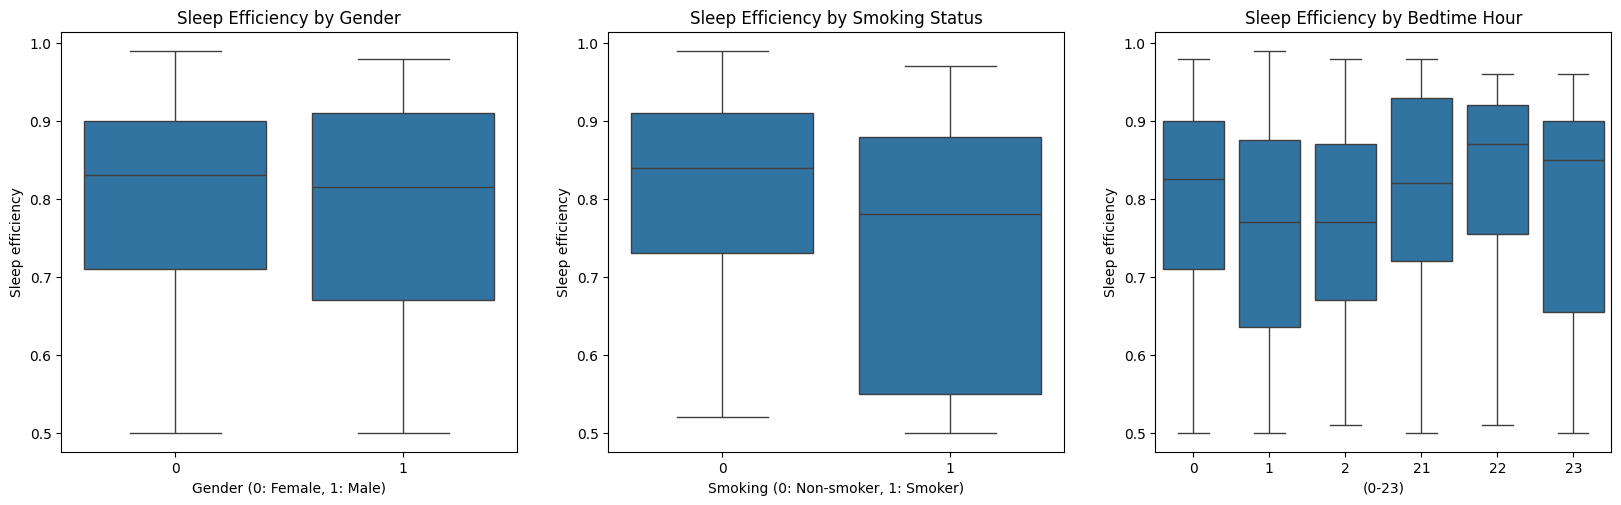

In [17]:
# Target variable (Sleep efficiency) distribution by categorical variables
plt.figure(figsize=(20, 12))

plt.subplot(2, 3, 1)
sns.boxplot(x='Gender_encoded', y='Sleep efficiency', data=processed_df)
plt.title('Sleep Efficiency by Gender')
plt.xlabel('Gender (0: Female, 1: Male)')

plt.subplot(2, 3, 2)
sns.boxplot(x='Smoking_encoded', y='Sleep efficiency', data=processed_df)
plt.title('Sleep Efficiency by Smoking Status')
plt.xlabel('Smoking (0: Non-smoker, 1: Smoker)')

plt.subplot(2, 3, 3)
sns.boxplot(x='Bedtime_hour', y='Sleep efficiency', data=processed_df)
plt.title('Sleep Efficiency by Bedtime Hour')
plt.xlabel('(0-23)')



This visualization shows minimal differences in sleep efficiency between genders and also in bedtime hour. However, non-smokers tend to have higher, more concentrated scores, while smokers exhibit greater variability, with some values as low as 0.5.

Text(0.5, 0, 'mg per day')

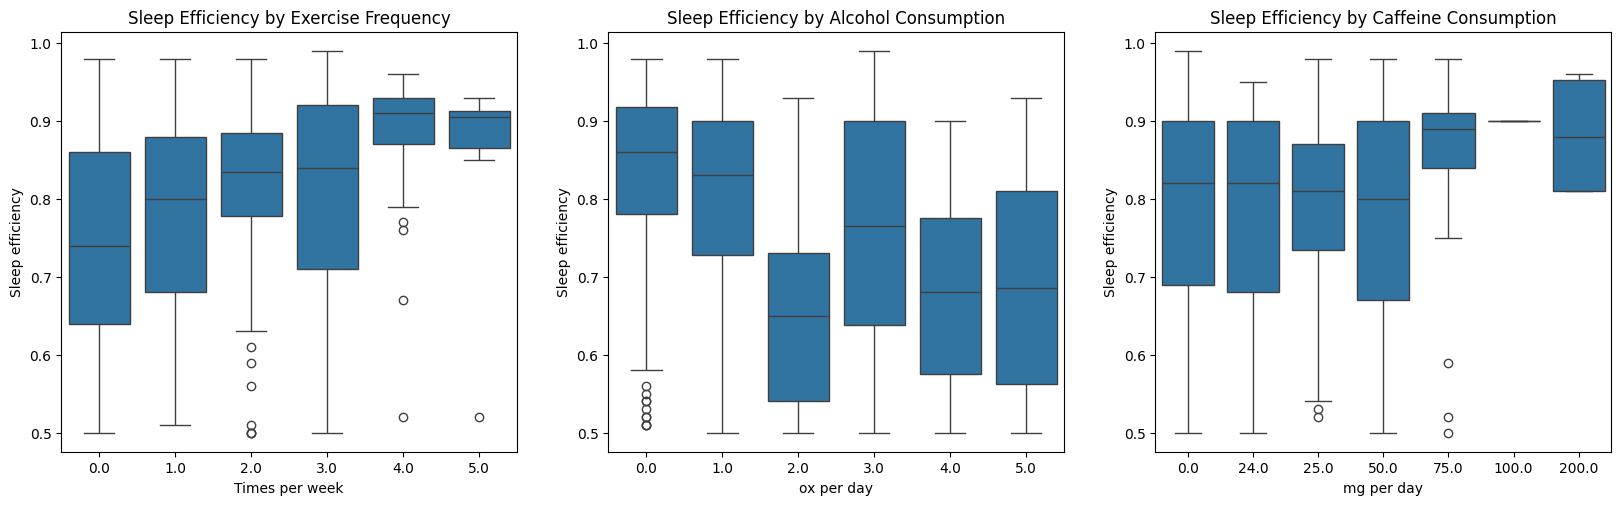

In [18]:
# Target variable (Sleep efficiency) distribution by discrete variables
plt.figure(figsize=(20, 12))

plt.subplot(2, 3, 1)
sns.boxplot(x='Exercise frequency', y='Sleep efficiency', data=processed_df)
plt.title('Sleep Efficiency by Exercise Frequency')
plt.xlabel('Times per week')

plt.subplot(2, 3, 2)
sns.boxplot(x='Alcohol consumption', y='Sleep efficiency', data=processed_df)
plt.title('Sleep Efficiency by Alcohol Consumption')
plt.xlabel('ox per day')

plt.subplot(2, 3, 3)
sns.boxplot(x='Caffeine consumption', y='Sleep efficiency', data=processed_df)
plt.title('Sleep Efficiency by Caffeine Consumption')
plt.xlabel('mg per day')

The plots for exercise frequency and caffeine consumption show no significant differences, only showing a little more variance in regards to the exercise frequency. However, in the alcohol consumption plot, there is a tendency for those who drink less to have better sleep. A similar pattern appears in exercise frequency, where higher weekly exercise levels correlate with better sleep efficiency.

Text(0.5, 0, 'hours')

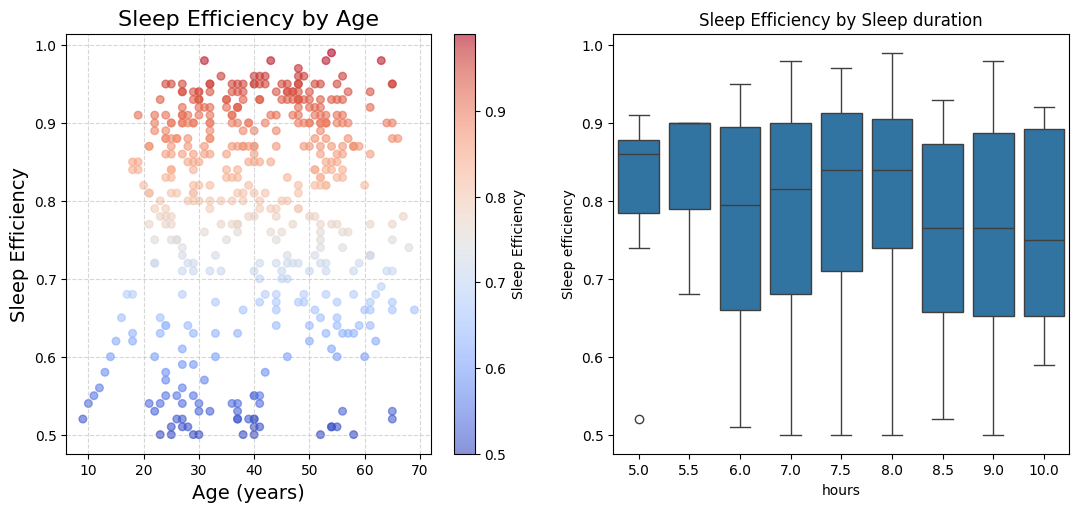

In [19]:
# Target variable (Sleep efficiency) distribution by continous variables
plt.figure(figsize=(20, 12))
plt.subplot(2, 3, 1)
scatter = plt.scatter(
    processed_df['Age'], 
    processed_df['Sleep efficiency'], 
    c=processed_df['Sleep efficiency'], 
    cmap='coolwarm', 
    alpha=0.6, 
    s=30
)
plt.colorbar(scatter, label='Sleep Efficiency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.title('Sleep Efficiency by Age', fontsize=16)
plt.xlabel('Age (years)', fontsize=14)
plt.ylabel('Sleep Efficiency', fontsize=14)

plt.subplot(2, 3, 2)
sns.boxplot(x='Sleep duration', y='Sleep efficiency', data=processed_df)
plt.title('Sleep Efficiency by Sleep duration')
plt.xlabel('hours')

The visualizations of age and sleep duration distribution do not reveal strong correlations with sleep efficiency. We can actually see that people with 5 and 5.5 hours of sleep have a higher sleep efficiency with less variance.

## Considerations and Conclusions

We took a quick look at our data and realized that some preprocessing was needed:

- We replaced the bedtime and wake-up time columns with a new column that expresses the hour of the day the person went to sleep.

- We mapped non-numerical columns to numerical values.

- We replaced missing values (NaNs) with the average.

Then we proceeded to analyze the dataset, identifying relationships between variables and assessing data balance:

- Starting with the correlation between variables

- Moving on to the distribution of each variable

- Ending with the analysis of the target variable against other variables